# Project: Exploring Stock Performance - Analyzing Leading Entertainment Giants
## Class : STAT 206
## Final Project
## Project members: Pious Khemka and Vishesh Jaiprakash Shukla

In [1]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 8 × Intel(R) Core(TM) i7-10610U CPU @ 1.80GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
  Threads: 2 on 8 virtual cores


In [2]:
import Pkg
Pkg.status()
using HTTP
using JSON
using DataFrames
using Dates
using Plots
using Statistics

Status `C:\Users\EndUser\Project.toml`
  [9d0fb3db] ARFIMA v0.4.0
  [336ed68f] CSV v0.10.13
  [717857b8] DSP v0.7.9
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.15.1
  [4d6a76a9] Econometrics v0.2.10
⌃ [587475ba] Flux v0.13.13
  [cd3eb016] HTTP v1.10.4
  [09f84164] HypothesisTests v0.11.0
  [7073ff75] IJulia v1.24.2
  [4e3cecfd] ImageShow v0.3.8
  [682c06a0] JSON v0.21.4
  [1902f260] Knet v1.4.10
  [f0e99cf1] MLBase v0.9.2
  [eb30cadb] MLDatasets v0.7.14
  [a7f614a8] MLJBase v1.2.1
  [e1d29d7a] Missings v1.1.0
  [8b842266] PalmerPenguins v0.1.4
  [91a5bcdd] Plots v1.40.2
  [d330b81b] PyPlot v2.11.2
  [b0e4dd01] RollingFunctions v0.8.0
  [3646fa90] ScikitLearn v0.7.0
  [99342f36] StateSpaceModels v0.6.7
⌅ [2913bbd2] StatsBase v0.33.21
⌅ [3eaba693] StatsModels v0.6.33
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.24.1
  [10745b16] Statistics v1.10.0
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ ar

In [3]:
function fetch_stock_data(symbol::String, start_date::String, end_date::String)
    url = "https://query1.finance.yahoo.com/v8/finance/chart/$symbol?period1=$start_date&period2=$end_date&interval=1d"
    response = HTTP.get(url)
    data = JSON.parse(String(response.body))
    
    timestamps = Dates.unix2datetime.(data["chart"]["result"][1]["timestamp"])
    open_prices = data["chart"]["result"][1]["indicators"]["quote"][1]["open"]
    high_prices = data["chart"]["result"][1]["indicators"]["quote"][1]["high"]
    low_prices = data["chart"]["result"][1]["indicators"]["quote"][1]["low"]
    close_prices = data["chart"]["result"][1]["indicators"]["quote"][1]["close"]
    adj_close_prices = data["chart"]["result"][1]["indicators"]["adjclose"][1]["adjclose"]
    volumes = data["chart"]["result"][1]["indicators"]["quote"][1]["volume"]
    
    df = DataFrame(
        timestamp = timestamps,
        open = open_prices,
        high = high_prices,
        low = low_prices,
        close = close_prices,
        adj_close = adj_close_prices,
        volume = volumes
    )
    
    return df
end


# Set up start and end dates for data grab
start_date = "1672531200"  # Unix timestamp for "2023-01-01"
end_date = "1704063599"    # Unix timestamp for "2023-12-31"

# List of finance stocks
finance_list = ["DIS", "NFLX", "CMCSA", "PARA"]

# Fetch stock data for each finance stock in the list for the specified date range
dfs = Dict{String, DataFrame}()
for stock in finance_list
    dfs[stock] = fetch_stock_data(stock, start_date, end_date)
end

# Set plotting backend to GR
#gr()

# Function to plot data
function plot_stock(df::DataFrame, stock_name::String)
    plot(df.timestamp, df.close, label=stock_name, legend=:bottomright)
    xlabel!("Date")
    ylabel!("Closing Price")
    title!("Stock Price Over Time for $stock_name")
end

# Plotting each stock's data
for (stock, df) in dfs
    plot_stock(df, stock)
end

In [4]:
using DataFrames

# Define company dataframes
DIS = dfs["DIS"]
NFLX = dfs["NFLX"]
CMCSA = dfs["CMCSA"]
PARA = dfs["PARA"]

# Define company names
company_name = ["The Walt Disney Company", "Netflix, Inc.", "Comcast Corporation", "Paramount Global"]

# Add company names as a new column to the dataframes
for (company, com_name) in zip([DIS, NFLX, CMCSA, PARA], company_name)
    company[!, "company_name"] .= com_name
end

# Concatenate all finance stock data into a single dataframe
df = vcat(DIS, NFLX, CMCSA, PARA)

# Display a sample of the concatenated dataframe for each company
for (company, com_name) in zip([DIS, NFLX, CMCSA, PARA], company_name)
    println("Sample data for $com_name:")
    display(first(company, 2))  # Displaying the first two rows of data for each company
    println()  # Print an empty line for separation
end


Sample data for The Walt Disney Company:


2×8 DataFrame
 Row │ timestamp            open   high   low    close  adj_close  volume    c ⋯
     │ DateTime             Any    Any    Any    Any    Any        Any       S ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-01-03T14:30:00  88.98  89.97  87.83  88.97  88.681     14997100  T ⋯
   2 │ 2023-01-04T14:30:00  90.0   92.75  89.36  91.98  91.6812    14957200  T
                                                                1 column omitted


Sample data for Netflix, Inc.:


2×8 DataFrame
 Row │ timestamp            open    high    low     close   adj_close  volume  ⋯
     │ DateTime             Any     Any     Any     Any     Any        Any     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-01-03T14:30:00  298.06  298.39  288.7   294.95  294.95     6764000 ⋯
   2 │ 2023-01-04T14:30:00  298.24  311.14  295.51  309.41  309.41     9345100
                                                                1 column omitted


Sample data for Comcast Corporation:


2×8 DataFrame
 Row │ timestamp            open   high   low    close  adj_close  volume    c ⋯
     │ DateTime             Any    Any    Any    Any    Any        Any       S ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-01-03T14:30:00  34.94  35.59  34.74  35.57  34.5935    23175300  C ⋯
   2 │ 2023-01-04T14:30:00  36.25  36.97  36.03  36.59  35.5855    24067700  C
                                                                1 column omitted


Sample data for Paramount Global:


2×8 DataFrame
 Row │ timestamp            open   high   low    close  adj_close  volume    c ⋯
     │ DateTime             Any    Any    Any    Any    Any        Any       S ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-01-03T14:30:00  17.39  17.7   16.87  17.07  16.6265    12693300  P ⋯
   2 │ 2023-01-04T14:30:00  17.4   18.55  17.14  18.5   18.0194    13236100  P
                                                                1 column omitted

In [5]:
# Descriptive statistics for the data
println("Descriptive Statistics:")
println(describe(df))
println()

Descriptive Statistics:
8×7 DataFrame
 Row │ variable      mean       min                  median               max                      nmissing  eltype   
     │ Symbol        Union…     Any                  Any                  Any                      Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                2023-01-03T14:30:00  2023-07-04T13:30:00  2023-12-29T14:30:00             0  DateTime
   2 │ open          135.095    10.72                63.11                494.0                           0  Any
   3 │ high          136.879    10.81                63.625               500.89                          0  Any
   4 │ low           133.419    10.51                62.715               489.25                          0  Any
   5 │ close         135.167    10.7                 63.22                495.02                          0  Any
   6 │ adj_close     134.865    10.

# Change in Price and Investor Sentiment of Stock over Time

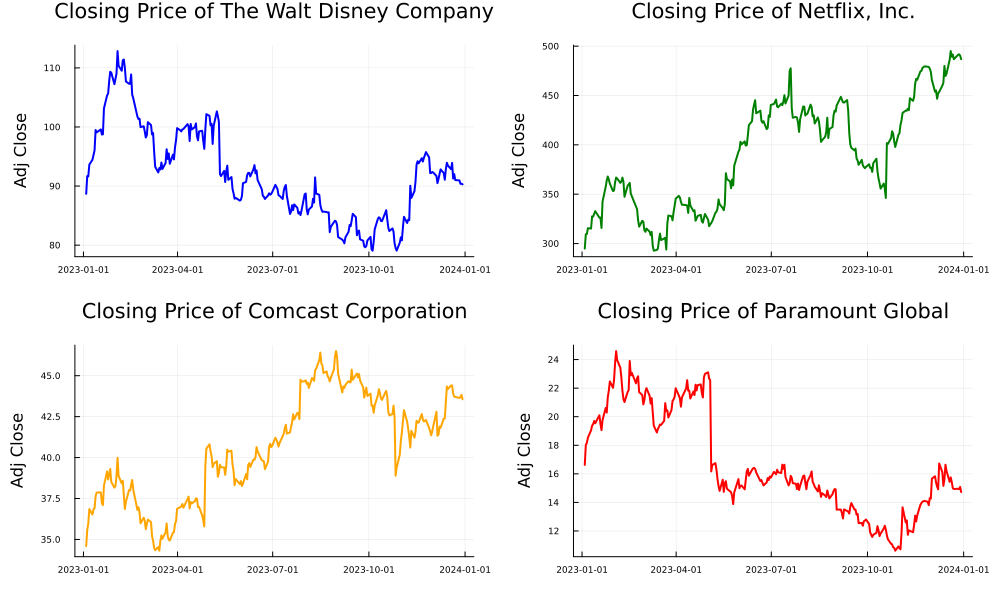

In [6]:
# Define company list and company names
company_list = [DIS, NFLX, CMCSA, PARA]
company_name = ["The Walt Disney Company", "Netflix, Inc.", "Comcast Corporation", "Paramount Global"]

# Define custom colors for the lines
colors = [:blue, :green, :orange, :red]
fig = plot(layout = grid(2, 2), size = (1000, 600), margin=5Plots.mm)
subplot_count = 1
# Create a new plot with a specific size
#plot(size=(900, 600), margin=(50, 30), legend=false)

# Loop through each company to plot its adjusted close prices
for i in 1:length(company_list)
    company = company_list[i]
    plot!(company[:, "timestamp"], company[:, "adj_close"], color=colors[i], linewidth=2, linestyle=:solid,
          xlabel="", ylabel="Adj Close", title="Closing Price of $(company_name[i])",
          tickfontsize=6, subplot = subplot_count)
   subplot_count += 1
end

# Adjust layout and display the plot
plot!(legend=false)
fig


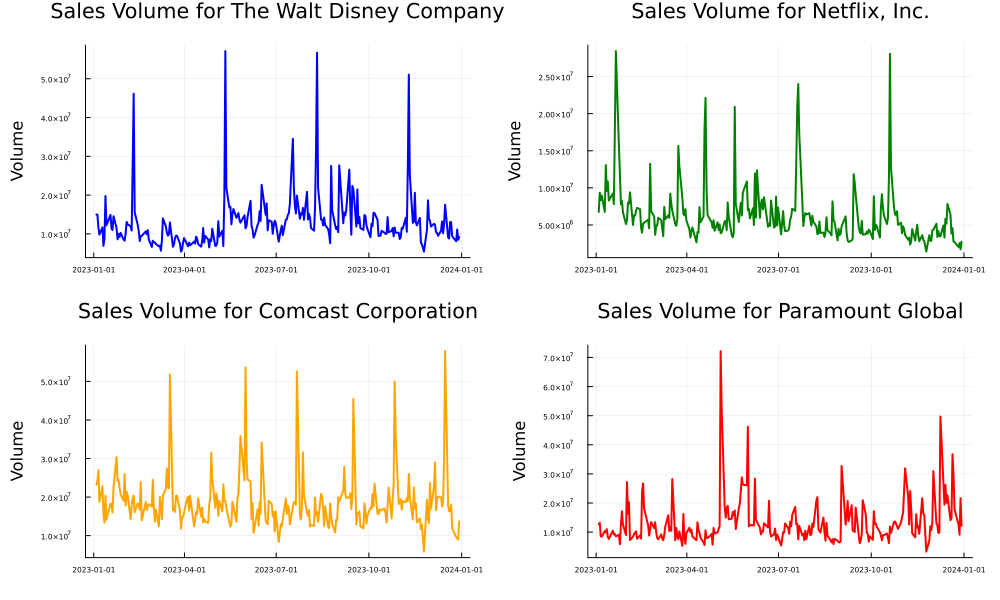

In [7]:

fig2 = plot(layout = grid(2, 2), size = (1000, 600), margin=5Plots.mm)
subplot_count = 1

# Loop through each company to plot its sales volume
for i in 1:length(company_list)
    company = company_list[i]
    plot!(company[:, "timestamp"], company[:, "volume"], color=colors[i], linewidth=2, linestyle=:solid,
          xlabel="", ylabel="Volume", title="Sales Volume for $(company_name[i])",
          tickfontsize=5, subplot = subplot_count)
    subplot_count += 1
end

# Adjust layout and display the plot
plot!(legend=false)
fig2

# Studying Moving Averages to smooth out short-term fluctuations and highlight longer-term trends in stock prices

In [8]:
# Define company list and company names
company_list = [DIS, NFLX, CMCSA, PARA]
company_name = ["The Walt Disney Company", "Netflix, Inc.", "Comcast Corporation", "Paramount Global"]
using DSP
using Statistics
# Define the moving average days
ma_days = [10, 20, 50, 100, 200]

# Calculate moving averages for a DataFrame
function calculate_moving_averages(compName, ma_days)
    companyData=filter(:company_name => ==(compName),df)
    adjClose=Float64.(Vector(companyData[!,"adj_close"]))
    DateTime=Vector(companyData[!,"timestamp"])
    maDF=DataFrame(DateTime=DateTime, AdjClose=adjClose)
    n=length(adjClose)
  for ma in ma_days
      maDF[!,"$(ma)"]=[[NaN  for i in 1:(ma-1)]; [mean(adjClose[(j-ma+1):j]) for j in ma:n]]
  end 
  return maDF
end

maCompDict=Dict()

for i in eachindex(company_list)
    maCompDict[company_name[i]] = calculate_moving_averages(company_name[i], ma_days)
end
maCompDict[company_name[1]]

250×7 DataFrame
 Row │ DateTime             AdjClose  10        20        50        100        ⋯
     │ DateTime             Float64   Float64   Float64   Float64   Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2023-01-03T14:30:00   88.681   NaN       NaN       NaN       NaN        ⋯
   2 │ 2023-01-04T14:30:00   91.6812  NaN       NaN       NaN       NaN
   3 │ 2023-01-05T14:30:00   91.6214  NaN       NaN       NaN       NaN
   4 │ 2023-01-06T14:30:00   93.6149  NaN       NaN       NaN       NaN
   5 │ 2023-01-09T14:30:00   94.4621  NaN       NaN       NaN       NaN        ⋯
   6 │ 2023-01-10T14:30:00   95.2496  NaN       NaN       NaN       NaN
   7 │ 2023-01-11T14:30:00   96.0171  NaN       NaN       NaN       NaN
   8 │ 2023-01-12T14:30:00   99.4858  NaN       NaN       NaN       NaN
   9 │ 2023-01-13T14:30:00   99.0771  NaN       NaN       NaN       NaN        ⋯
  10 │ 2023-01-17T14:30:00   99.5854   94.9476  NaN       NaN       NaN
  11 │ 2023-01-18T14:30:00   98.7183   95.9513  NaN       NaN       NaN
  ⋮  │          ⋮              ⋮         ⋮         ⋮         ⋮         ⋮       ⋱
 241 │ 2023-12-15T14:30:00   93.46     92.1779   92.9462   87.9411   85.9075
 242 │ 2023-12-18T14:30:00   92.86     92.2928   92.897    88.1448   85.9852   ⋯
 243 │ 2023-12-19T14:30:00   93.93     92.6363   92.8575   88.3349   86.066
 244 │ 2023-12-20T14:30:00   91.27     92.643    92.7138   88.4661   86.0927
 245 │ 2023-12-21T14:30:00   92.02     92.64     92.5767   88.615    86.1255
 246 │ 2023-12-22T14:30:00   91.02     92.46     92.3403   88.7539   86.1755   ⋯
 247 │ 2023-12-26T14:30:00   90.95     92.335    92.1448   88.8913   86.2329
 248 │ 2023-12-27T14:30:00   90.38     92.266    92.0538   88.9903   86.2765
 249 │ 2023-12-28T14:30:00   90.4      92.023    91.9639   89.0799   86.315
 250 │ 2023-12-29T14:30:00   90.29     91.658    91.8589   89.1976   86.3395   ⋯
                                                   1 column and 229 rows omitted

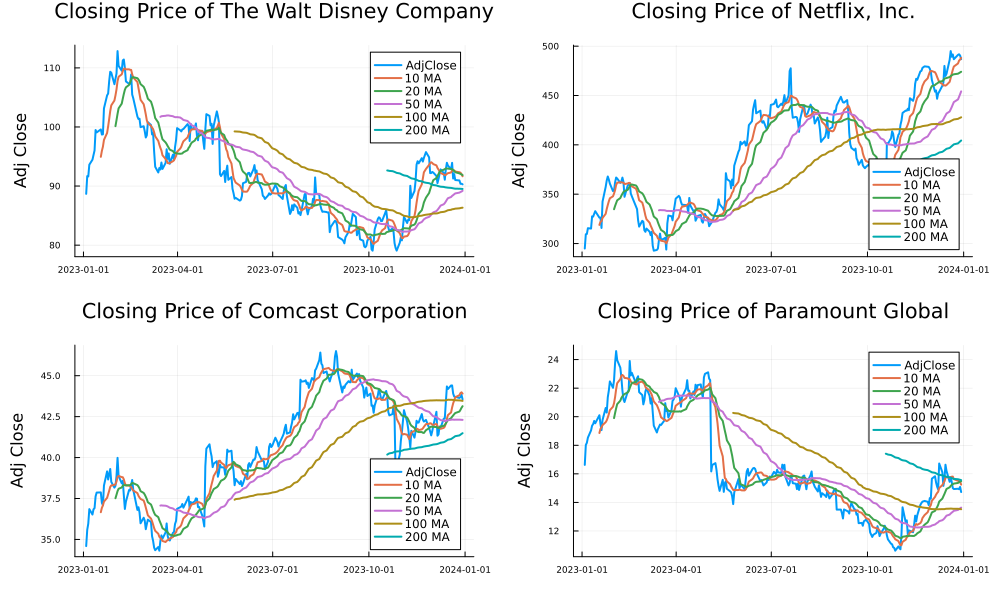

In [9]:
labels=reshape([["AdjClose"]; ["$(ma) MA" for ma in ma_days]],(1,6))
fig = plot(layout = grid(2, 2), size = (1000, 600), margin=5Plots.mm)
subplot_count = 1

# Loop through each company to plot its adjusted close prices
for i in company_name
    plotData=maCompDict[i]
    plot!(plotData[!,1], Matrix(plotData[!,2:7]), linewidth=2, linestyly=:solid, 
          xlabel="", ylabel="Adj Close", title="Closing Price of $(i)",label=labels,
          tickfontsize=6, subplot = subplot_count)
   subplot_count += 1
end

fig

In [10]:
# Calculate the daily returns for each finance stock
for company in company_list
    adj_close = company[:, "adj_close"]
    daily_return = [missing; diff(adj_close) ./ adj_close[1:end-1]]
    company[!, "Daily Return"] = daily_return
end

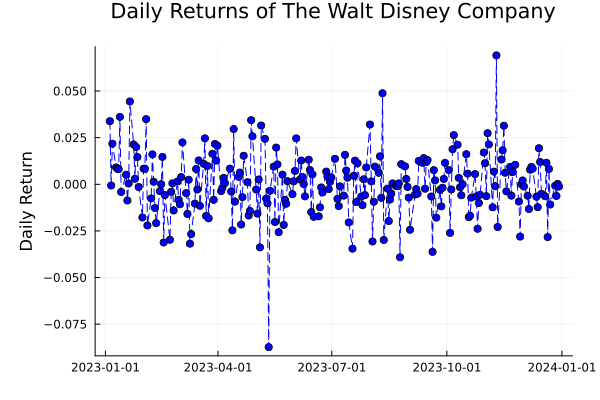

In [11]:
company1 = company_list[1]
plot(company1[:, "timestamp"], company1[:, "Daily Return"], label=company_name[1], legend=false, 
    linestyle=:dash, marker=:circle, ylabel="Daily Return", margin=5Plots.mm, color=colors[1], title = "Daily Returns of $(company_name[1])")

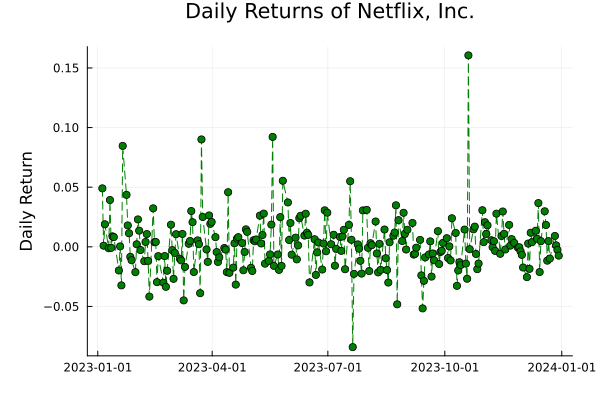

In [12]:
company2 = company_list[2]
plot(company2[:, "timestamp"], company2[:, "Daily Return"], label=company_name[2], legend=false, 
    linestyle=:dash, marker=:circle, ylabel="Daily Return", margin=5Plots.mm, color=colors[2], title = "Daily Returns of $(company_name[2])")

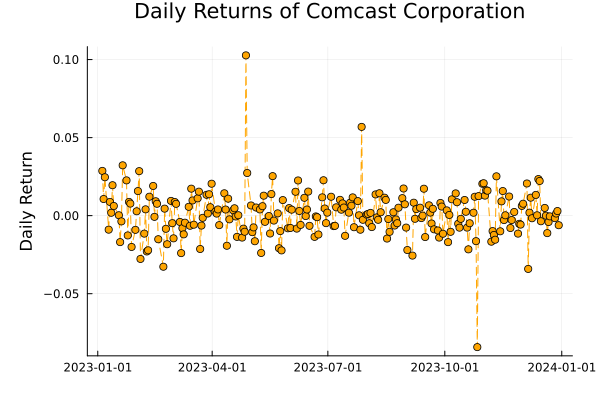

In [13]:
company3 = company_list[3]
plot(company3[:, "timestamp"], company3[:, "Daily Return"], label=company_name[3], legend=false, 
    linestyle=:dash, marker=:circle, ylabel="Daily Return", margin=5Plots.mm, color=colors[3], title = "Daily Returns of $(company_name[3])")

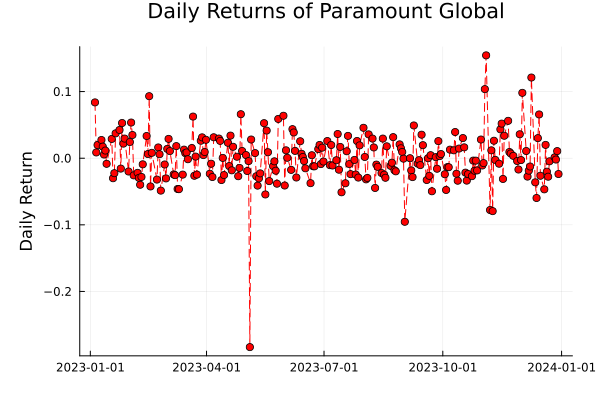

In [14]:
company4 = company_list[4]
plot(company4[:, "timestamp"], company4[:, "Daily Return"], label=company_name[4], legend=false, 
    linestyle=:dash, marker=:circle, ylabel="Daily Return", margin=5Plots.mm, color=colors[4], title = "Daily Returns of $(company_name[4])")

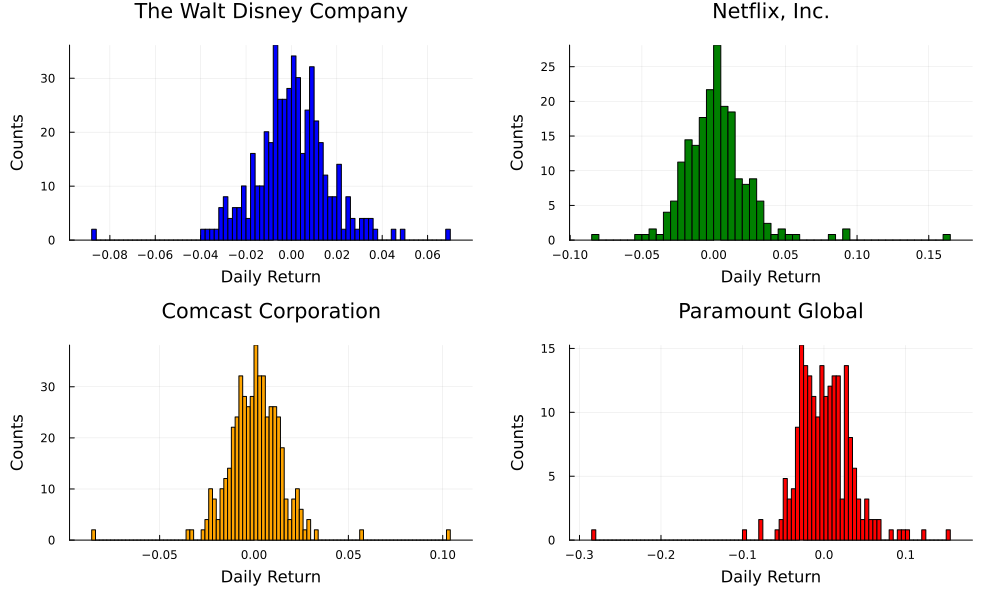

In [15]:
using StatsPlots

fig3 = plot(layout = grid(2, 2), size = (1000, 600), margin=5Plots.mm)
subplot_count = 1
i = 1
for company in company_list
    histogram!(company[:, "Daily Return"], bins=100, color=colors[i], label="", kde=true,
               xlabel="Daily Return", ylabel="Counts", title=company_name[i], subplot = subplot_count, normalize=:pdf)
    subplot_count += 1
    i += 1
end

# Adjust layout and display the plot
plot!(legend=false)
fig3

In [16]:
using DataFrames
using Plots
using StatsPlots

# Create a DataFrame with all the daily returns
tech_rets = DataFrame([Symbol(com_name) => company[:, "Daily Return"] for (company, com_name) in zip(company_list, company_name)])
tech_rets

clean_tech_rets = dropmissing(tech_rets)
clean_tech_rets
# Compute correlation matrix of daily returns
correlation_returns = cor(Matrix(clean_tech_rets))
correlation_returns

4×4 Matrix{Float64}:
 1.0       0.301028  0.412979  0.530411
 0.301028  1.0       0.238705  0.162576
 0.412979  0.238705  1.0       0.387783
 0.530411  0.162576  0.387783  1.0

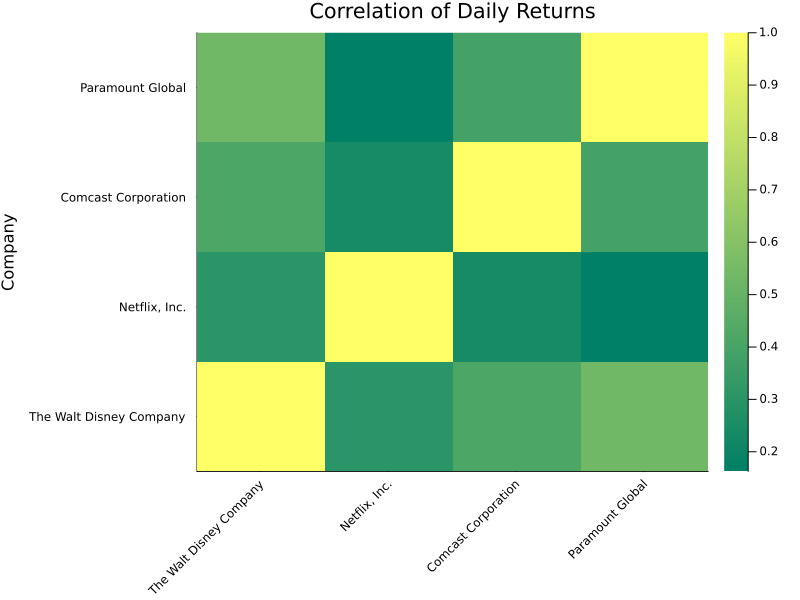

In [17]:
# Plot correlation matrix
heatmap(
    company_name, company_name, correlation_returns,
    xrotation=45, # Rotate labels for better readability
    xlabel="Company", ylabel="Company",
    title="Correlation of Daily Returns",
    color=:summer,
    size=(800, 600),
    showvalues=true
)



# How much value do we put at risk by investing in a particular stock?

In [18]:
using Plots
using MLDatasets
using Random
using MLBase
using Flux
using Flux: Chain, Dense, LSTM

function floatConv(x)
    return convert.(Float64, x)
end

# Assuming company_list is a list of DataFrames
company_data = company_list[2]

column_to_copy = company_data[:, "close"]
scale_data_temp = DataFrame(close = column_to_copy)
transform!(scale_data_temp, [:close] .=> floatConv .=> [:close])

# Add the close prices to the DataFrame

dt = fit(UnitRangeTransform, scale_data_temp.close, dims=1)
scaled_data = StatsBase.transform(dt, scale_data_temp.close)

# Split data for training and testing
split_ratio = 0.90
training_data_len = floor(Int, size(scaled_data, 1) * split_ratio)
train_data = scaled_data[1:training_data_len]
test_data = scaled_data[training_data_len + 1:end]

x_train = []
y_train = []

for i in 60:length(train_data)
    push!(x_train, train_data[i-59:i, 1])
    push!(y_train, train_data[i, 1])
end

x_train = hcat(x_train...)
y_train = convert(Array, y_train)

# Reshape and transpose x_train
x_train = permutedims(reshape(x_train, (size(x_train, 1), size(x_train, 2), 1)), (2, 1, 3))

#x_train = reshape(x_train, (size(x_train, 1), size(x_train, 2), 1))

# Define the LSTM model
model = Chain(
    LSTM(1, 128),
    LSTM(128, 64),
    Dense(64, 25, relu),
    Dense(25, 1)
)

# Define loss function and optimizer
loss(x, y) = Flux.mse(model(x), y)
optimizer = Flux.ADAM()

# Compile the model
Flux.train!(loss, Flux.params(model), [(x_train, y_train)], optimizer)

# Creating testing dataset
test_data = scaled_data[training_data_len - 60 + 1:end, :]
x_test = []

for i in 60:length(test_data)
    push!(x_test, test_data[i-59:i, 1])
end
x_test
x_test = convert(Tensor, hcat(x_test...))
x_test = reshape(x_test, (size(x_test, 1), look_back, 1))

# Make predictions
predictions = Flux.predict(model, x_test)

# Inverse transform for original scale
predictions = inverse_transform(scaler, predictions)

# Assuming company_data has a "Date" column
train_df = DataFrame(timestamp = company_data[1:training_data_len, :]["timestamp"], close = company_data[1:training_data_len, :]["close"])  # Select all columns for rows
valid_df = DataFrame(timestamp = company_data[(training_data_len + 1):end, :]["timestamp"], close = company_data[(training_data_len + 1):end, :]["close"], Predictions = predictions)  # Select all columns for rows

# Visualization (assuming Plots is available)
plot(train_df.timestamp, train_df.close, label = "Train")
plot!(valid_df.timestamp, valid_df.close, label = "Actual")
plot!(valid_df.timestamp, valid_df.Predictions, label = "Predictions")


LoadError: DimensionMismatch: layer LSTMCell(1 => 128) expects size(input, 1) == 1, but got 166×60 view(::Array{Float64, 3}, :, :, 1) with eltype Float64